<a href="https://colab.research.google.com/github/leompinheiro/DeepLearning/blob/main/AtividadeDissertativaDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar Bibliotecas**

In [69]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Importar o dataset Fashion MNIST**

In [70]:
fm = keras.datasets.fashion_mnist
(ImagensTreino, RotulosTreino), (ImagensTeste, RotulosTeste) = fm.load_data()

# **Criar classes de rótulos**

In [71]:
ClassesRotulos = ['Camiseta/top', 'Calça','Pulôver','Vestido','Casaco','Sandália','Camisa','Tênis','Bolsa','Bota']

# **Verificar dataset**

O dataset de treino possui 60.000 imagens, cada uma com 28X28 pixels

In [72]:
ImagensTreino.shape

(60000, 28, 28)

O dataset de treino possui 60.000 rótulos

In [73]:
len(RotulosTreino)

60000

o dataset de treino possui 10 classes de rótulos

In [74]:
pd.Series(RotulosTreino).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

O dataset de teste possui 10.000 imagens, cada uma com 28X28 pixels

In [75]:
ImagensTeste.shape

(10000, 28, 28)

O dataset de teste possui 10.000 rótulos

In [76]:
len(RotulosTeste)

10000

o dataset de teste possui 10 classes de rótulos

In [77]:
pd.Series(RotulosTeste).value_counts()

9    1000
2    1000
1    1000
6    1000
4    1000
5    1000
7    1000
3    1000
8    1000
0    1000
dtype: int64

# **Preparar do dataset**

Exibir as 10 primeiras imagens do dataset de treino, com seus respectivos rótulos

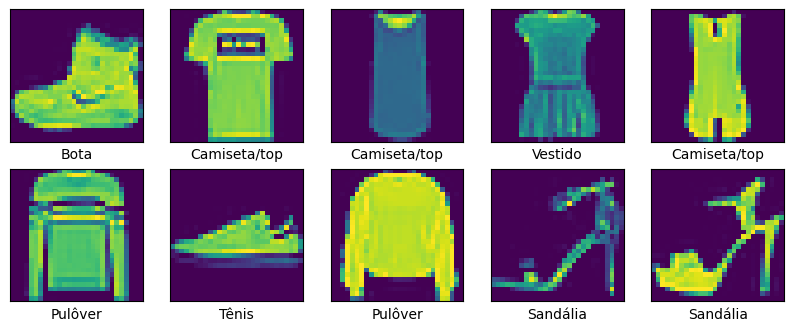

In [78]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ImagensTreino[i])
    plt.xlabel(ClassesRotulos[RotulosTreino[i]])

Normalização do dataset (cor)

In [79]:
ImagensTreinoN = ImagensTreino / 255.0
ImagensTesteN = ImagensTeste / 255.0

Exibir as 10 primeiras imagens do dataset de treino normalizado, com seus respectivos rótulos

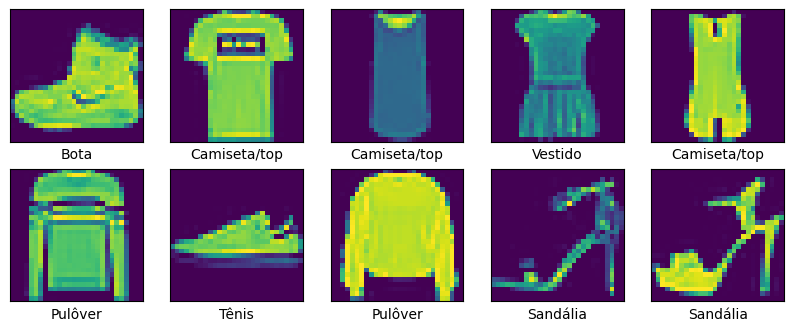

In [80]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ImagensTreinoN[i])
    plt.xlabel(ClassesRotulos[RotulosTreino[i]])

# **Construção dos modelos**

- Modelo1

In [81]:
Modelo1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

- Modelo2

In [82]:
Modelo2 = keras.Sequential([
    keras.layers.Conv2D(8, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


- Modelo3

In [83]:
Modelo3 = keras.Sequential([
  keras.layers.Conv2D(8, kernel_size=3, activation='relu', input_shape=(28,28,1)),
  keras.layers.Conv2D(8, kernel_size=3, activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.25),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(10, activation='softmax')
])

# **Compilar os modelos**

In [84]:
Modelo1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Modelo2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Modelo3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **Treinar os modelos**

- Configuração da quantidade de épocas de treinamento

In [85]:
epocas = 10

- Treinar Modelo1

In [86]:
historico1 = Modelo1.fit(ImagensTreinoN, RotulosTreino, epochs=epocas, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5170 - accuracy: 0.8212 - val_loss: 0.4342 - val_accuracy: 0.8470
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3909 - accuracy: 0.8600 - val_loss: 0.3931 - val_accuracy: 0.8584
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3488 - accuracy: 0.8744 - val_loss: 0.3668 - val_accuracy: 0.8676
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3207 - accuracy: 0.8830 - val_loss: 0.3445 - val_accuracy: 0.8763
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3023 - accuracy: 0.8883 - val_loss: 0.3417 - val_accuracy: 0.8737
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2846 - accuracy: 0.8955 - val_loss: 0.3306 - val_accuracy: 0.8807
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2744 - accuracy: 0.8987 - val_loss: 0.3289 - val_accuracy:

- Treinar Modelo2

In [87]:
historico2 = Modelo2.fit(ImagensTreinoN, RotulosTreino, epochs=epocas, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 4ms/step - loss: 0.4421 - accuracy: 0.8418 - val_loss: 0.3405 - val_accuracy: 0.8782
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3082 - accuracy: 0.8889 - val_loss: 0.2857 - val_accuracy: 0.8971
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2696 - accuracy: 0.9032 - val_loss: 0.3002 - val_accuracy: 0.8900
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2375 - accuracy: 0.9129 - val_loss: 0.2682 - val_accuracy: 0.9035
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2164 - accuracy: 0.9205 - val_loss: 0.2481 - val_accuracy: 0.9118
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1951 - accuracy: 0.9293 - val_loss: 0.2550 - val_accuracy: 0.9126
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1812 - accuracy: 0.9332 - val_loss: 0.2541 - val_accuracy:

- Treinar Modelo3

In [88]:
historico3 = Modelo3.fit(ImagensTreinoN, RotulosTreino, epochs=epocas, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5381 - accuracy: 0.8040 - val_loss: 0.3567 - val_accuracy: 0.8775
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3686 - accuracy: 0.8668 - val_loss: 0.3050 - val_accuracy: 0.8898
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3243 - accuracy: 0.8808 - val_loss: 0.2832 - val_accuracy: 0.9000
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2980 - accuracy: 0.8920 - val_loss: 0.2694 - val_accuracy: 0.8995
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2802 - accuracy: 0.8973 - val_loss: 0.2561 - val_accuracy: 0.9052
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2669 - accuracy: 0.9004 - val_loss: 0.2548 - val_accuracy: 0.9074
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2510 - accuracy: 0.9057 - val_loss: 0.2443 - val_accuracy:

# **Análise gráfica dos resultados de treinamento e validação dos três modelos**

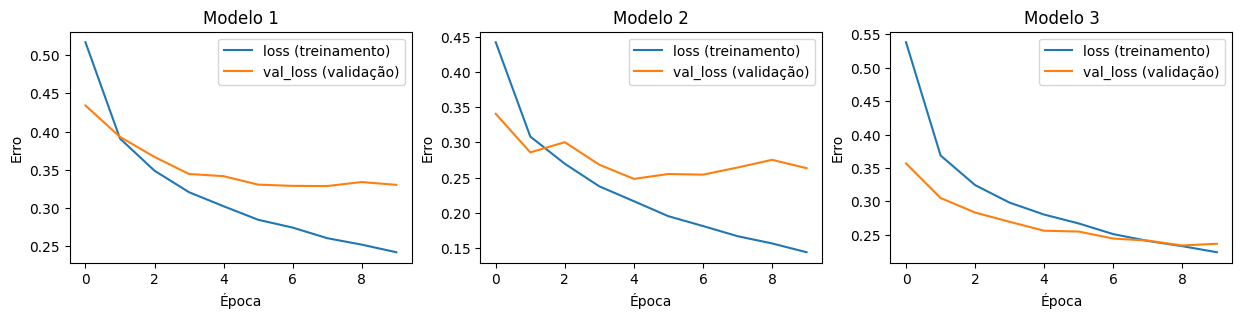

In [91]:

plt.figure(figsize=(15,3))
plt.subplot(131)
plt.title('Modelo 1')
plt.plot(historico1.history['loss'])
plt.plot(historico1.history['val_loss'])
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')

plt.subplot(132)
plt.title('Modelo 2')
plt.plot(historico2.history['loss'])
plt.plot(historico2.history['val_loss'])
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')

plt.subplot(133)
plt.title('Modelo 3')
plt.plot(historico3.history['loss'])
plt.plot(historico3.history['val_loss'])
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')

# **Avaliando a Acurácia dos modelos**

In [153]:
test_loss1, test_acc1 = Modelo1.evaluate(ImagensTesteN, RotulosTeste)
test_loss2, test_acc2 = Modelo2.evaluate(ImagensTesteN, RotulosTeste)
test_loss3, test_acc3 = Modelo3.evaluate(ImagensTesteN, RotulosTeste)

313/313 [==============================] - 1s 3ms/step - loss: 0.2524 - accuracy: 0.9088


# **Análise gráfica da acurácia no treinamento, validação e teste dos três modelos**

- Preparação dos valores

In [193]:
lM1 = [historico1.history['loss'][-1],historico1.history['val_loss'][-1],test_loss1]
lM2 = [historico2.history['loss'][-1],historico2.history['val_loss'][-1],test_loss2]
lM3 = [historico3.history['loss'][-1],historico3.history['val_loss'][-1],test_loss3]

aM1 = [historico1.history['accuracy'][-1],historico1.history['val_accuracy'][-1],test_acc1]
aM2 = [historico2.history['accuracy'][-1],historico2.history['val_accuracy'][-1],test_acc2]
aM3 = [historico3.history['accuracy'][-1],historico3.history['val_accuracy'][-1],test_acc3]

barra = 0.25
r1 = np.arange(len(lM1))
r2 = [x + barra for x in r1]
r3 = [x + barra for x in r2]

- Exibir gráfico do erro obtido nos modelos (etapas de treinamento, validação e teste)





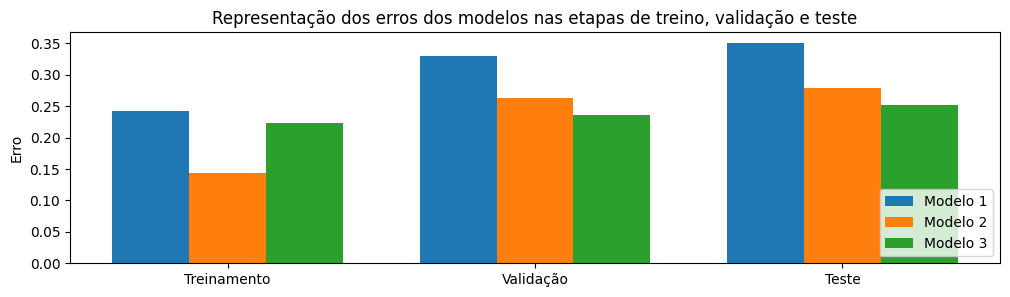

In [204]:
plt.figure(figsize=(12,3))
plt.title('Representação dos erros dos modelos nas etapas de treino, validação e teste')
plt.bar(r1, lM1, width=barra, label='Modelo 1')
plt.bar(r2, lM2, width=barra, label='Modelo 2')
plt.bar(r3, lM3, width=barra, label='Modelo 3')
plt.ylabel('Erro')
plt.xticks([r + barra for r in range(len(lM1))], ['Treinamento','Validação','Teste'])
plt.legend(loc='lower right')
plt.show()

- Exibir gráfico da acurácia obtida nos modelos (etapas de treinamento, validação e teste)

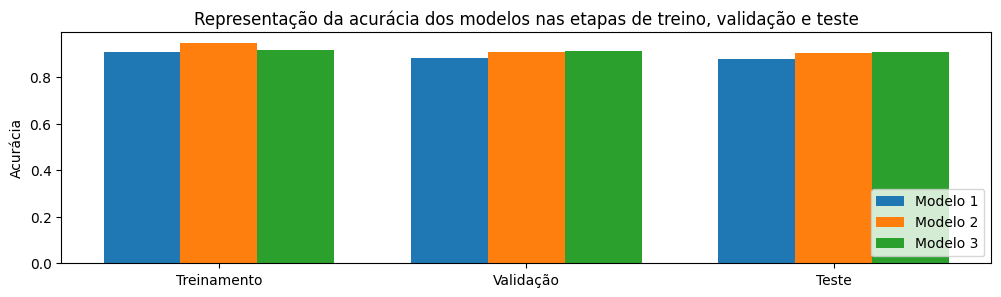

In [207]:
plt.figure(figsize=(12,3))
plt.title('Representação da acurácia dos modelos nas etapas de treino, validação e teste')
plt.bar(r1, aM1, width=barra, label='Modelo 1')
plt.bar(r2, aM2, width=barra, label='Modelo 2')
plt.bar(r3, aM3, width=barra, label='Modelo 3')
plt.ylabel('Acurácia')
plt.xticks([r + barra for r in range(len(lM1))], ['Treinamento','Validação','Teste'])
plt.legend(loc='lower right')
plt.show()